<a href="https://colab.research.google.com/github/varuncanamedi3301/Control-Systems-Simulation/blob/main/SAS_AAT_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
from sympy import *
from numpy import *
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import simps

# 1. CONVOLUTION OF DISCRETE TIME SIGNAL(DTS) :-

Consider two Discrete time sequences x(n) = [1,2,3] and y(n) = [1,1]. Let, y(n) be the convolution product defined as,
                      ##           y(n) = sigma(k =(-oo, +oo), x(k)*h(n-k))

In [ ]:
def sig(A,N):
  u = zeros(N)
  for i in range(0,N):
    u[i] = A[i]
  return u  

## Graphical Representation of x(n):-

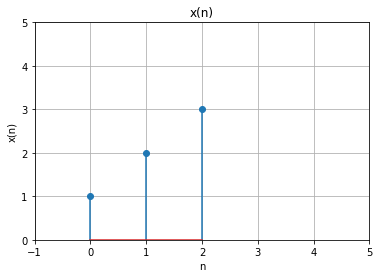

In [ ]:
n = [0,1,2]
N = len(n)
A = [1,2,3]
x = sig(A,N)
plt.stem(n,x, use_line_collection=True)
plt.axis([-1,5,0,5])
plt.title('x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()

## Graphical Representation of h(n) :-

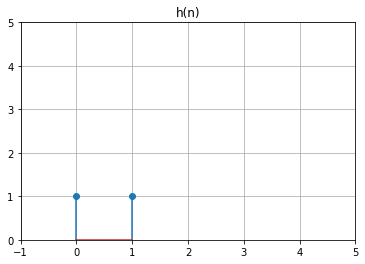

In [ ]:
n1 =[0,1]
N1 =len(n1)
A1 = [1,1]
h = sig(A1,N1)
plt.stem(n1,h, use_line_collection=True)
plt.axis([-1,5,0,5])
plt.title('h(n)')
plt.grid()

## Convolution Product of x(n) and h(n) :-

[1. 3. 5. 3.]


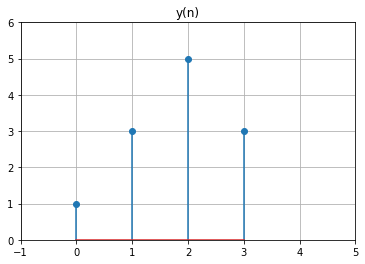

In [ ]:
y = np.convolve(x,h)
n2 = np.array(range(0,len(y)))
plt.stem(n2,y, use_line_collection=True)
plt.axis([-1,5,0,6])
plt.title('y(n)')
plt.grid()
print(y)

# 2. Z - TRANSFORM OF A DISCRETE TIME SIGNAL :- 

Z-Transform converts a discrete time signal, which is a sequence of real or complex numbers into frequency domain representation. let us see how to perform z transform using python. consider, DTS x(n),
                ##                x(n) = [5,3,-3,0,4,-2]

  Z-transform of the signal can be represented as,
                        ##         Z.T [x(n)] = sigma(n=(-oo, +oo), x(n)*z^(-n))

## Graphical representation of x(n) :-

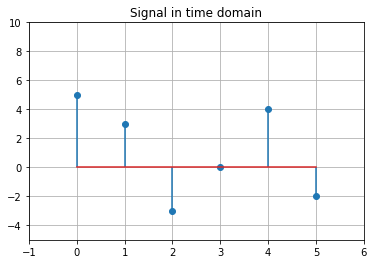

In [ ]:
A = [5,3,-3,0,4,-2]
n = np.array(range(0,len(A)))
N =len(n)
x = sig(A,N)
plt.stem(n,x, use_line_collection=True)
plt.title('Signal in time domain')
plt.axis([-1,6,-5,10])
plt.grid()

## Computing the Z-Transform of x(n) :-

In [ ]:
def zt(f,n):
  z = Symbol('z')
  sum = 0
  for i in range(n):
    sum = sum + f[i]*z**(-i)
  return sum
ztx = zt(x, N)
print("ZT[x(n)] =", ztx)

ZT[x(n)] = 5.0 + 3.0/z - 3.0/z**2 + 4.0/z**4 - 2.0/z**5


# 3.FOURIER SERIES REPRESENTATION OF PERIODIC SIGNALS : -
For a continous time periodic signal, the fourier series representation can be given as ,
    ##                      x(t) = sigma(k=(-oo,+oo), a(k)exp(j*k*(2*pi/T))

Now let us see the fourier series representation of various Continous time signals(CTS).

## Square Wave Representation : -
A square wave can be represented as,
     ##         x(t) = {-1, (-pi<t<0)
                        1, (0<t<pi)}

In [ ]:
t = sp.symbols('t')
x = sp.Piecewise((-1, t<0), (1, t>0))
ser = sp.fourier_series(x,(t, -1*pi, 1*pi))
ser.truncate(5)

4.0*sin(0.318309886183791*pi*t)/pi + 1.33333333333333*sin(0.954929658551372*pi*t)/pi + 0.8*sin(1.59154943091895*pi*t)/pi + 0.571428571428571*sin(2.22816920328654*pi*t)/pi + 0.444444444444444*sin(2.86478897565412*pi*t)/pi

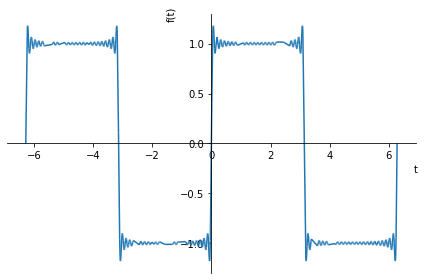

In [ ]:
sp.plot(ser.truncate(25), (t, -2*pi, 2*pi))

## Triangular wave Representation :-
A triangular wave can be represented as,
     ##         tri(x) = max(1-|x|, 0)

In [ ]:
x1 = sp.Piecewise((-t-2, ((t>=-2)&(t <= -1))),
                  (t, ((t >=-1)&(t <= 1))),
                  (-t+2, ((t>=1)&(t<=2))))
ser1 = fourier_series(x1, (t, -2,2))
ser1.truncate(5)

8*sin(pi*t/2)/pi**2 - 8*sin(3*pi*t/2)/(9*pi**2) + 8*sin(5*pi*t/2)/(25*pi**2) - 8*sin(7*pi*t/2)/(49*pi**2) + 8*sin(9*pi*t/2)/(81*pi**2)

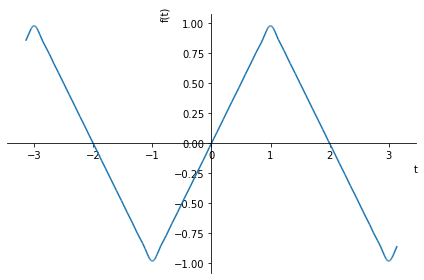

In [ ]:
sp.plot(ser1.truncate(10), (t, -pi, pi))

# 4. Impulse Response of a Discrete-time system : -

The output of a discrete time LTI system is completely determined by the input and the system's response to a unit impulse.The output for a unit impulse input is called the impulse response. 
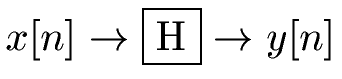

Text(0.5, 0, 'n')

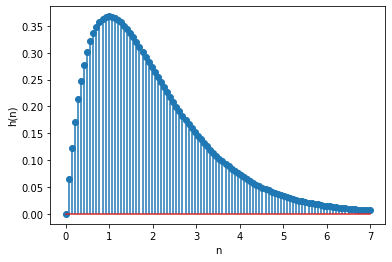

In [ ]:
from scipy import signal
system = ([1.0], [1.0, 2.0, 1.0])
t, y = signal.impulse2(system)
#print("the impulse response of the system is ", y)
plt.stem(t, y, use_line_collection= True)
plt.ylabel('h(n)')
plt.xlabel("n")

# 5. Generating elementary Signals in continous time :-

## Sine wave

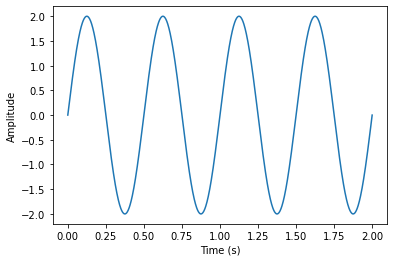

In [ ]:
freq = 2
amp = 2
time = np.linspace(0, 2, 1000)
signal1 = amp*np.sin(2*np.pi*freq*time)
plt.plot(time, signal1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Square Wave 

In [ ]:
signal2 = amp*signal.square(2*np.pi*freq*time, duty=0.3)

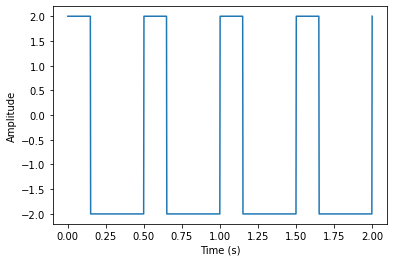

In [ ]:
plt.plot(time, signal2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Triangular Wave

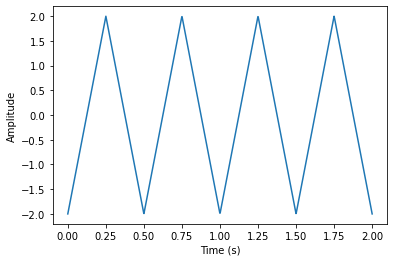

In [ ]:
signal3 = amp*signal.sawtooth(2*np.pi*freq*time, width=0.5)
plt.plot(time, signal3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
